## Project UNIL_TUDOR

The first thing we do is to set the various parameters to start our project

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download -c detecting-french-texts-difficulty-level-2023
from zipfile import ZipFile
with ZipFile('detecting-french-texts-difficulty-level-2023.zip','r') as zip:
  zip.extractall(path="")

  0% 0.00/303k [00:00<?, ?B/s]
100% 303k/303k [00:00<00:00, 80.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import spacy
from spacy import displacy
from sklearn.base import TransformerMixin
import seaborn as sns

We import the data from Kaggle

In [ ]:
df_training = pd.read_csv('training_data.csv')
df_test =pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_sample = pd.read_csv('sample_submission.csv')

We use a vectorizer like TfidfVectorizer to convert texts into numerical vectors.

In [ ]:
tfidf_vector = TfidfVectorizer()

We assign the sentences from our dataset to X, and their corresponding difficulty levels to Y.

In [ ]:
X = df_training['sentence']
y = df_training['difficulty']

After doing our research on the internet, we found that the best train-test ratio is 80/20. Others also claim that 70/30 can also work, but we prefer the 80/20 ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

##We have seen that methods such as KNN, Logistic Regression, Decision Tree or Random Forrest Tree are suggested. We'll first start with the KNN method.

## 1. KNN Model (K-Nearest Neigbors)

Develop a KNN (K-Nearest Neighbors) model by using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Creating an instance of KNeighborsClassifier with explicit default parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2)

# Assembling the vectorizer and classifier in a pipeline
knn_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('knn_classifier', knn_classifier)
])

# Training the model on the training set
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('knn_classifier', KNeighborsClassifier())])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_knn = knn_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predicted_labels_knn)
print("Accuracy:", accuracy)

precision = precision_score(y_test, predicted_labels_knn, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, predicted_labels_knn, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, predicted_labels_knn, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.31979166666666664
Precision: 0.40447154448902534
Recall: 0.31979166666666664
F1 Score: 0.3028669637117734


In [ ]:
knn_pipeline.predict(X_test)

array(['A1', 'A1', 'B2', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A1', 'B1',
       'A1', 'A1', 'B1', 'A2', 'B2', 'B2', 'A2', 'A2', 'A1', 'A2', 'A2',
       'A1', 'A1', 'C2', 'A1', 'C2', 'B2', 'B1', 'A2', 'A2', 'A2', 'A1',
       'A1', 'A1', 'A1', 'C2', 'A1', 'C2', 'A1', 'C1', 'A1', 'C1', 'A2',
       'A1', 'B1', 'A2', 'A1', 'B2', 'C2', 'A2', 'A1', 'A1', 'A1', 'B2',
       'B1', 'A1', 'A1', 'C2', 'B1', 'A1', 'B2', 'A2', 'B1', 'A2', 'A1',
       'A1', 'A1', 'A1', 'A1', 'C1', 'A1', 'C2', 'C2', 'A1', 'A1', 'A1',
       'C2', 'A2', 'A1', 'A2', 'A1', 'B2', 'A1', 'B1', 'C1', 'A1', 'B2',
       'A1', 'A1', 'C2', 'B1', 'C2', 'B1', 'C2', 'B1', 'A1', 'B2', 'A1',
       'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'A1', 'A1', 'A1', 'B1', 'A1',
       'A1', 'B2', 'A2', 'A1', 'A1', 'A1', 'A2', 'B2', 'A1', 'B1', 'B1',
       'A1', 'A1', 'A2', 'B1', 'B1', 'A2', 'A2', 'A1', 'A2', 'A2', 'B1',
       'B1', 'A1', 'A1', 'A1', 'A2', 'A1', 'A1', 'B2', 'A1', 'A1', 'B2',
       'B2', 'A2', 'A1', 'B2', 'A1', 'A2', 'C2', 'A

In [ ]:
df_test['test_prediction']=knn_pipeline.predict(df_test['sentence'])

In [ ]:
df_sub_knn=df_test[['test_prediction']]
df_sub_knn.to_csv('submission.csv')

 Here, there are many methods for improving classification reports, but we've chosen the Hyperparameter optimization with GridSearchCV method because it will help us to find the best combination of parameters to improve model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'n_neighbors': np.arange(1, 10),
    'p': np.arange(1, 3),
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
pipeline_knn_grid_search = Pipeline([
    ('tfidf_vectorizer', tfidf_vector),
    ('knn_grid_search', knn_grid_search)
])

pipeline_knn_grid_search.fit(X_train, y_train)
print('Best parameters found:', knn_grid_search.best_params_)

Best parameters found: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_knn_classifier = KNeighborsClassifier(n_neighbors=4, p=2, weights='distance', algorithm='auto')
optimized_knn_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vector),
    ('knn_classifier', optimized_knn_classifier)
])

optimized_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('knn_classifier',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])

We can see that the accuracy, precision, recall and f1 score are better than before.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimized_predicted_labels_knn = optimized_knn_pipeline.predict(X_test)

optimized_accuracy = accuracy_score(y_test, optimized_predicted_labels_knn)
print("Accuracy:", optimized_accuracy)

optimized_precision = precision_score(y_test, optimized_predicted_labels_knn, average='weighted')
print("Precision:", optimized_precision)

optimized_recall = recall_score(y_test, optimized_predicted_labels_knn, average='weighted')
print("Recall:", optimized_recall)

optimized_f1 = f1_score(y_test, optimized_predicted_labels_knn, average='weighted')
print("F1 Score:", optimized_f1)

Accuracy: 0.36770833333333336
Precision: 0.4241811079766578
Recall: 0.36770833333333336
F1 Score: 0.3570560404187049


In [ ]:
df_test['test_prediction']=optimized_knn_pipeline.predict(df_test['sentence'])

In [ ]:
df_sub_optimized_knn=df_test[['test_prediction']]

In [ ]:
df_sub_optimized_knn.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 33.8kB/s]
Successfully submitted to Detecting the difficulty level of French texts

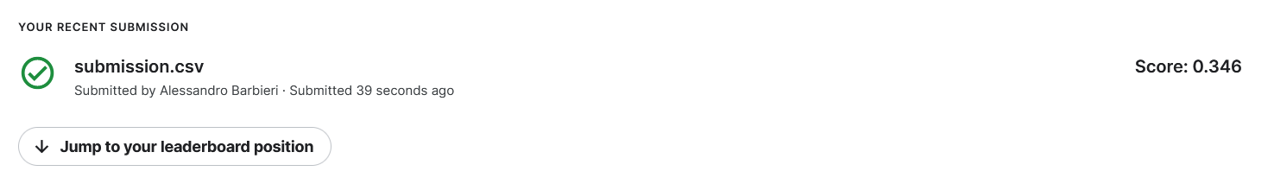

# 2. Decision Tree Classifier Model


Develop a Decision Tree Classifier Model by Using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()

decision_tree_classifier = DecisionTreeClassifier(random_state=0)

decision_tree_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('decision_tree_classifier', decision_tree_classifier)
])

decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('decision_tree_classifier',
                 DecisionTreeClassifier(random_state=0))])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_decision_tree = decision_tree_pipeline.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, predicted_labels_decision_tree)
print("Accuracy:", accuracy_decision_tree)

precision_decision_tree = precision_score(y_test, predicted_labels_decision_tree, average='weighted')
print("Precision:", precision_decision_tree)

recall_decision_tree = recall_score(y_test, predicted_labels_decision_tree, average='weighted')
print("Recall:", recall_decision_tree)

f1_decision_tree = f1_score(y_test, predicted_labels_decision_tree, average='weighted')
print("F1 Score:", f1_decision_tree)

Accuracy: 0.296875
Precision: 0.3003578282448995
Recall: 0.296875
F1 Score: 0.2952457659392269


We improve the model by using Hyperparameter optimization with GridSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV

depth_grid = {'max_depth': np.arange(5, 25)}
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), depth_grid, cv=5)

decision_tree_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('grid_search', decision_tree_grid_search)
])

decision_tree_pipeline.fit(X_train, y_train)
predictions = decision_tree_pipeline.predict(X_test)

print("Best parameters found:", decision_tree_grid_search.best_params_)

With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_decision_tree = DecisionTreeClassifier(max_depth=16, random_state=0)
optimized_decision_tree_pipeline = Pipeline([
    ('vectorizer', tfidf_vector),
    ('classifier', optimized_decision_tree)
])

optimized_decision_tree_pipeline.fit(X_train, y_train)

We can see that the Accuracy, Precision and Recall are better than before, except F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimised_predicted_labels_decision_tree = optimized_decision_tree_pipeline.predict(X_test)

optimised_accuracy_decision_tree = accuracy_score(y_test, optimised_predicted_labels_decision_tree)
print("Accuracy:", optimised_accuracy_decision_tree)

optimised_precision_decision_tree = precision_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("Precision:", optimised_precision_decision_tree)

optimised_recall_decision_tree = recall_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("Recall:", optimised_recall_decision_tree)

optimised_f1_decision_tree = f1_score(y_test, optimised_predicted_labels_decision_tree, average='weighted')
print("F1 Score:", optimised_f1_decision_tree)

In [ ]:
df_test['test_prediction']=optimized_decision_tree_pipeline.predict(df_test['sentence'])
df_sub_optimized_DT=df_test[['test_prediction']]

In [ ]:
df_sub_optimized_DT.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 33.1kB/s]
Successfully submitted to Detecting the difficulty level of French texts

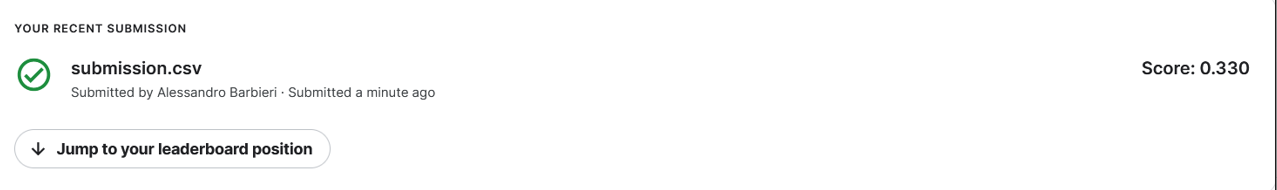

# 3. Random Forrest Classifier Model


Develop a Random Forrest Classifier Model by Using a TFIDF (Term Frequency-Inverse Document Frequency) vectorization approach.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()

random_forest_classifier = RandomForestClassifier(random_state=0)

random_forest_pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('random_forest_classifier', random_forest_classifier)
])

random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=0))])

As requested in the instructions, we display the Accuracy, Precision, Recall and F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels_random_forest = random_forest_pipeline.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, predicted_labels_random_forest)
print("Accuracy:", accuracy_random_forest)

precision_random_forest = precision_score(y_test, predicted_labels_random_forest, average='weighted')
print("Precision:", precision_random_forest)

recall_random_forest = recall_score(y_test, predicted_labels_random_forest, average='weighted')
print("Recall:", recall_random_forest)

f1_random_forest = f1_score(y_test, predicted_labels_random_forest, average='weighted')
print("F1 Score:", f1_random_forest)

Accuracy: 0.41354166666666664
Precision: 0.4228475404545226
Recall: 0.41354166666666664
F1 Score: 0.3999781375094399


We improve the model by using Hyperparameter optimization with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': np.arange(5, 25),
    'n_estimators': [10, 50, 100, 200]
}

random_forest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

random_forest_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('grid_search', random_forest_grid_search)
])

random_forest_pipeline.fit(X_train, y_train)
predictions = random_forest_pipeline.predict(X_test)

print("Best parameters found:", random_forest_grid_search.best_params_)

Best parameters found: {'max_depth': 24, 'n_estimators': 200}


With the help of the Hyperparameter optimization, we'll try again to see if our results are more accurate.

In [ ]:
optimized_random_forest = RandomForestClassifier(max_depth=19, n_estimators=200, random_state=0)

optimized_random_forest_pipeline = Pipeline([
    ('vectorizer', tfidf_vector),
    ('classifier', optimized_random_forest)
])

optimized_random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=19, n_estimators=200,
                                        random_state=0))])

We show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

optimised_predicted_labels_random_forest = optimized_random_forest_pipeline.predict(X_test)

optimised_accuracy_random_forest = accuracy_score(y_test, optimised_predicted_labels_random_forest)
print("Accuracy:", optimised_accuracy_random_forest)

optimised_precision_random_forest = precision_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("Precision:", optimised_precision_random_forest)

optimised_recall_random_forest = recall_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("Recall:", optimised_recall_random_forest)

optimised_f1_random_forest = f1_score(y_test, optimised_predicted_labels_random_forest, average='weighted')
print("F1 Score:", optimised_f1_random_forest)

Accuracy: 0.4041666666666667
Precision: 0.41226998528759295
Recall: 0.4041666666666667
F1 Score: 0.3841999931943235


In [ ]:
df_test['test_prediction'] = optimized_random_forest_pipeline.predict(df_test['sentence'])
df_sub_optimized_RF = df_test[['test_prediction']]

In [ ]:
df_sub_optimized_RF.to_csv('submission.csv')

In [ ]:
! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

100% 8.31k/8.31k [00:00<00:00, 10.0kB/s]
Successfully submitted to Detecting the difficulty level of French texts

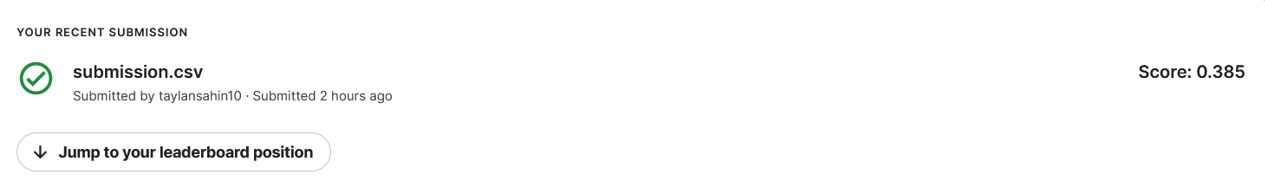